In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Customer_Churn_Prediction')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from split import split_data
from error_analysis import classification_summary
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer_Churn_Prediction/Telco-Customer-Churn-Final.csv")

In [ ]:
x = df.drop(columns="Churn", errors="ignore")
y = df["Churn"].astype(int)

In [ ]:
x

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,Contract_Risk,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Automatic
0,0,1,0,1,1,0,0,1,29.850000,2,1,0,0
1,0,0,0,34,1,1,0,0,56.950000,1,0,1,0
2,0,0,0,2,1,1,0,1,53.850000,2,0,1,0
3,0,0,0,45,1,1,1,0,42.300000,1,0,0,1
4,0,0,0,2,2,0,0,1,70.700000,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,1,0,66,2,0,0,1,105.386638,1,0,0,1
10344,0,0,0,1,2,0,0,1,79.882156,2,0,1,0
10345,0,0,0,3,1,0,0,0,49.243598,2,1,0,0
10346,0,0,0,7,2,0,0,1,94.578321,2,1,0,0


In [ ]:
x_train, x_val, x_test, y_train, y_val, y_test = split_data(x,y)
ratio = (y_train == 0).sum() / (y_train == 1).sum()
xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.02,
    max_depth=6,
    scale_pos_weight=ratio,
    eval_metric='logloss',
    min_child_weight=1
)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_val)
y_scores = xgb_model.predict_proba(x_val)[:, 1]
y_pred_proba = (y_scores >= 0.52).astype(int)

In [ ]:
print(classification_summary(y_val, y_pred_proba))

{'confusion_matrix':           Pred_0  Pred_1
Actual_0     408      94
Actual_1      87     446, 'metrics': {'accuracy': 0.8251207729468599, 'precision': 0.825925925925926, 'recall': 0.8367729831144465, 'f1': 0.8313140726933831}, 'error_breakdown': {'TP': np.int64(446), 'FP': np.int64(94), 'FN': np.int64(87), 'TN': np.int64(408)}, 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.82      0.81      0.82       502\n           1       0.83      0.84      0.83       533\n\n    accuracy                           0.83      1035\n   macro avg       0.83      0.82      0.82      1035\nweighted avg       0.83      0.83      0.83      1035\n'}


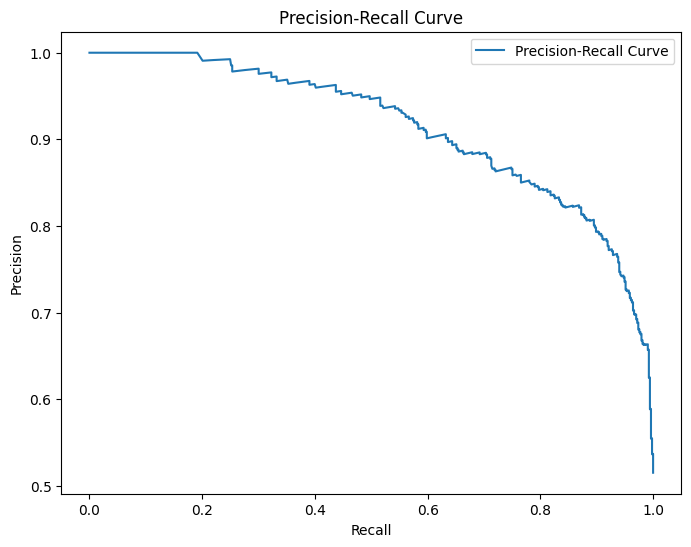

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()